<a href="https://colab.research.google.com/github/muditagarg/Drug-War/blob/main/Keyword_Extraction_Drug_WAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

In [ ]:
df = pd.read_csv('/content/CleanedTweets.csv')
df.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,geoplace_id,withheldcopyright,withheldcountry_codes,name,place_type,hashtags extracted,CleanedTweet
0,0,#WarOnDrugs,4.174290e+17,2013-12-29T22:56:48.000Z,en,16391744.0,RT @truthout: Why the Right to a Fair Trial Do...,11.0,0.0,0.0,0.0,NaN,NaN,NaN,Jersey City,city,warondrugs,rt truthout why the right to a fair trial does...
1,1,#WarOnDrugs,4.174277e+17,2013-12-29T22:51:34.000Z,en,481389375.0,#warondrugs #newjimcrow #itsreal @RollingStone...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rotterdam,city,"warondrugs, itsreal, newjimcrow",warondrugs newjimcrow itsreal rollingstone tha...
2,2,#WarOnDrugs,4.174272e+17,2013-12-29T22:49:46.000Z,en,415826305.0,@Aennie1 NSA's main target with WHITETAMALE is...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Denver,city,"WarOnDrugs, DerSPIEGEL",aennie1 nsas main target with whitetamale is m...
3,3,#WarOnDrugs,4.174249e+17,2013-12-29T22:40:15.000Z,en,251012783.0,Colorado pot sales to begin in 2014 #warondrug...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Division No. 6,admin,"warondrugs, colorado, drugs",colorado pot sales to begin in 2014 warondrugs...
4,4,#WarOnDrugs,4.174146e+17,2013-12-29T21:59:21.000Z,en,302152701.0,#Schumacher may die f/ skiing. Hypocritical t ...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,Philadelphia,city,"WarOnDrugs, Schumacher",schumacher may die f skiing hypocritical t all...


In [2]:
df= pd.read_csv('/content/Top5%.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,hashtag,id,created_at,lang,author_id,text,public_metricsretweet_count,public_metricsreply_count,public_metricslike_count,public_metricsquote_count,geoplace_id,hashtags extracted,CleanedTweet,interactionByWeights
0,0,170360,170360,NaN,6.790000e+17,2015-12-22T13:13:10.000Z,und,2.281731e+09,RT @MJIndustryNews: http://t.co/xWh0aBhY6S @Th...,5120.0,0.0,0.0,0.0,NaN,"WarOnDrugs, doj, Heroin, cannabis, dea",it mjindustrynews theweedmann willienelson tom...,15360.0
1,1,104495,104495,NaN,1.040000e+18,2018-09-02T14:35:51.000Z,en,7.852330e+07,The best offense is a good defense. Use the mo...,1894.0,250.0,5475.0,93.0,NaN,"liberals, DrugWar, IllegalInvasion, BuildTheWall.",the best offense is a good defense use the mon...,11657.0
2,2,283120,283120,NaN,9.290000e+17,2017-11-11T22:24:44.000Z,en,1.837262e+07,"Crack vs opioid addiction: 2 epidemics, but tr...",2520.0,0.0,13.0,0.0,NaN,"DrugWar, Resist, opiodepidemic",crack vs ovoid addition 2 epidemic but treated...,7573.0
3,3,282693,282693,NaN,9.310000e+17,2017-11-16T08:02:07.000Z,en,7.760000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520.0,0.0,0.0,0.0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560.0
4,4,282580,282580,NaN,9.320000e+17,2017-11-18T11:35:13.000Z,en,8.240000e+17,RT @movietvtechgeek: Crack vs opioid addiction...,2520.0,0.0,0.0,0.0,NaN,"o…, DrugWar, Resist",it movietvtechgeek crack vs ovoid addition 2 e...,7560.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14555 entries, 0 to 14554
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   14555 non-null  int64  
 1   Unnamed: 0.1                 14555 non-null  int64  
 2   Unnamed: 0.1.1               14555 non-null  int64  
 3   hashtag                      0 non-null      float64
 4   id                           14555 non-null  float64
 5   created_at                   14555 non-null  object 
 6   lang                         14555 non-null  object 
 7   author_id                    14555 non-null  float64
 8   text                         14555 non-null  object 
 9   public_metricsretweet_count  14555 non-null  float64
 10  public_metricsreply_count    14555 non-null  float64
 11  public_metricslike_count     14555 non-null  float64
 12  public_metricsquote_count    14555 non-null  float64
 13  geoplace_id     

In [5]:
df= df.drop(['Unnamed: 0'],axis=1)

In [6]:
df= df.drop(['Unnamed: 0.1'],axis=1)

In [7]:
df= df.drop(['Unnamed: 0.1.1'],axis=1)

Word Cloud for Keywords

In [8]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
text = ''
df['CleanedTweet'] = df['CleanedTweet'].fillna('')
for i in df['CleanedTweet']:
  text += str(i)

In [10]:
wordcloud = WordCloud().generate(text)

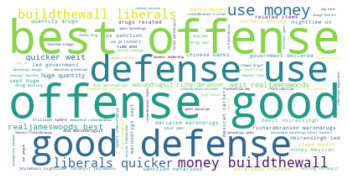

In [11]:
wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Yake Keyword Extraction

In [12]:
# Applying Keyword Extraction 
!pip install git+https://github.com/LIAAD/yake
import yake
       
# Building Yake model
def fitYAKE (text):
    # Specify parameters
    language = "en"
    max_ngram_size = 3
    deduplication_thresold = 0.9
    deduplication_algo = 'seqm'
    windowSize = 1
    numOfKeywords =40

    # Yake model with specified parameters
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size,  dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)
    return keywords

  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-76y10s8z
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-76y10s8z
  Created wheel for yake: filename=yake-0.4.8-py2.py3-none-any.whl size=60189 sha256=ba795fc0eaf87b4aa868438626de2275d1558105899b9bd518bc5f6cc60da838
  Stored in directory: /tmp/pip-ephem-wheel-cache-txlyl5pd/wheels/52/79/f4/dae9309f60266aa3767a4381405002b6f2955fbcf038d804da
  Created wheel for segtok: filename=segtok-1.5.10-py3-none-any.whl size=25030 sha256=59b62d15f9df40ef8b4d548263bb8e20a088b68ebcd70cbb4449c23977dcc973
  Stored in directory: /root/.cache/pip/wheels/67/b7/d0/a121106e61339eee5ed083bc230b1c8dc422c49a5a28c2addd
Successfully built yake segtok


In [13]:
p = fitYAKE(text)

In [14]:
print(p)

[('richardbranson visited warondrugs', 1.4564051377149477e-08), ('drugs drugwarmovieit richardbranson', 1.708162362849477e-08), ('warondrugs heit richardbranson', 1.7234758207677878e-08), ('richardbranson billions spent', 1.7890688892101947e-08), ('failed warondrugsit richardbranson', 2.0218854769613058e-08), ('money selling drugs', 2.6280823957233544e-08), ('policies drug war', 2.8602970147400775e-08), ('amp daughtersit richardbranson', 3.470596511601703e-08), ('painless warondrugsit richardbranson', 3.475008081602995e-08), ('mexican carters moving', 3.591554657540789e-08), ('sanction nefarious chinese', 3.594280293073967e-08), ('keepyourpromise legalized warondrugs', 3.8306477177267143e-08), ('legalized warondrugs cannabiscommuit', 3.8737227702918895e-08), ('reduction measuresit richardbranson', 4.030984483257674e-08), ('measuresit richardbranson billions', 4.036533843390242e-08), ('drug war photographer', 4.2109545031422396e-08), ('racism policies drug', 4.787417446070441e-08), ('ed

In [15]:
with open('CYakeKeywords.txt','w') as f:
 for t in p:
    f.write(''.join(str(s) for s in t) + '\n')

Word Cloud for Yake Extracted Terms

In [16]:
wordcloud = WordCloud().generate(str(p))

In [29]:
stopwords = set(STOPWORDS)
stopwords.update(['richardbranson'])

In [30]:
print(stopwords)

{'it', 'the', 'whom', 'in', "she's", "you've", 'myself', 'under', 'his', 'so', 'ours', 'on', "what's", "i'm", 'he', "haven't", "here's", 'own', 'you', "they'd", "won't", 'we', 'were', 'she', 'each', 'cannot', "shouldn't", 'after', 'of', 'themselves', "they've", 'because', 'are', 'below', 'having', 'since', 'them', 'same', 'get', 'our', "how's", "shan't", 'a', 'before', 'very', 'few', 'has', 'how', 'my', 'into', 'hers', 'who', 'when', 'those', 'http', "he'd", "it's", "doesn't", 'ourselves', 'but', 'between', 'had', 'your', 'until', "he's", "isn't", 'any', 'again', 'am', "we're", "hasn't", 'some', 'otherwise', 'being', 'be', "couldn't", 'www', "she'll", 'there', 'as', "when's", 'they', "hadn't", 'can', 'does', 'where', 'most', "that's", "you'll", 'like', 'just', "they'll", 'down', 'against', "you'd", 'shall', 'is', 'however', "why's", "mustn't", 'once', 'r', 'have', 'ought', "don't", 'theirs', 'com', 'here', 'itself', 'other', 'then', 'would', 'an', "i'd", "they're", 'else', 'which', 'no

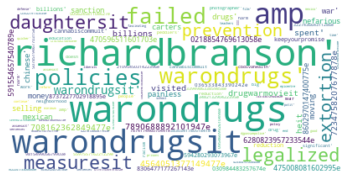

In [58]:
wordcloud = WordCloud(stopwords=stopwords, max_font_size=70, background_color="white").generate(str(p))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Rake Keyword Extraction

In [ ]:
import nltk
!pip install python-rake

In [ ]:
import RAKE
!pip install rake-nltk

In [ ]:
from rake_nltk import Rake

In [ ]:
rake_nltk_var = Rake()

In [ ]:
rake_nltk_var.extract_keywords_from_text(str(text))

In [ ]:
keyword_extracted = rake_nltk_var.get_ranked_phrases()
print(keyword_extracted)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Bert

In [32]:
pip install keybert

     |████████████████████████████████| 85 kB 3.0 MB/s 
     |████████████████████████████████| 209 kB 17.8 MB/s 
     |████████████████████████████████| 51 kB 6.6 MB/s 
     |████████████████████████████████| 2.6 MB 54.6 MB/s 
     |████████████████████████████████| 1.2 MB 46.1 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 636 kB 36.1 MB/s 
     |████████████████████████████████| 3.3 MB 37.3 MB/s 
     |████████████████████████████████| 895 kB 36.8 MB/s 
  Created wheel for keybert: filename=keybert-0.4.0-py3-none-any.whl size=20358 sha256=bb6f79d8c8e305237455b3ed2b8e442f8c3b7b8835e9e4d5ba26416fdf98427d
  Stored in directory: /root/.cache/pip/wheels/fe/e1/7f/8ee72e851e92320fba5c68d9e6e28d227671876429bc80f420
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126709 sha256=3fc860254adcc687b1e46d17dcfd078c4cc7c5ee7a15b585a53a60b622c8e9c0
  Stored in directory: /root/.cache/pip/whee

In [33]:
from keybert import KeyBERT

In [42]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), top_n= 40 )

In [43]:
print(keywords)

[('libertarianparty drugwar', 0.6027), ('drugwar policies', 0.5998), ('drug wars', 0.5934), ('opposition drugwar', 0.5897), ('war drugwar', 0.584), ('fight drug', 0.5829), ('drug war', 0.5804), ('drugwar justice', 0.5801), ('drugwar war', 0.5707), ('country drugwar', 0.5701), ('drugwar propagandait', 0.5675), ('drugwar propaganda', 0.563), ('drugwar drugs', 0.5546), ('legalized drugwar', 0.5541), ('menace drug', 0.5466), ('warondrugsit tacticaldoglive', 0.5465), ('drugwar', 0.5456), ('drugs drugwarmovieawful', 0.5425), ('policy drugs', 0.5396), ('drugwar oitnb', 0.5378), ('drugwar watch', 0.5378), ('drugwar illegalinvasion', 0.5367), ('drug menace', 0.5367), ('drugwar drug', 0.5356), ('drugwarmovieawful', 0.5353), ('criminaljustice drugwar24yearold', 0.5349), ('needs drugwar', 0.5319), ('campaign drug', 0.5309), ('drugmy', 0.5305), ('drugwar oit', 0.5304), ('warondrugsin drug', 0.5295), ('drugwar racialjustice', 0.5273), ('illegal warondrugs', 0.5235), ('drugwarmovieit', 0.5212), ('dru

In [44]:
with open('CBertKeywords.txt','w') as f:
 for r in keywords:
   f.write(''.join(str(s) for s in r) + '\n')

Bert Word Cloud

In [45]:
wordcloud = WordCloud().generate(str(keywords))

In [55]:
stopwords.update(['richardbranson','drug','drugs','drugwar'])

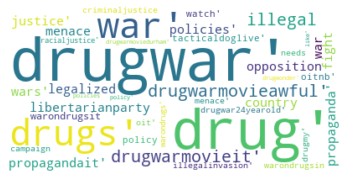

In [57]:
wordcloud = WordCloud( stopwords = stopwords, max_font_size=70, background_color="white").generate(str(keywords))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()